In [1]:
import tensorflow as tf
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import keras 
from keras.datasets import mnist

In [2]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 11s 1us/step


In [3]:
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


3


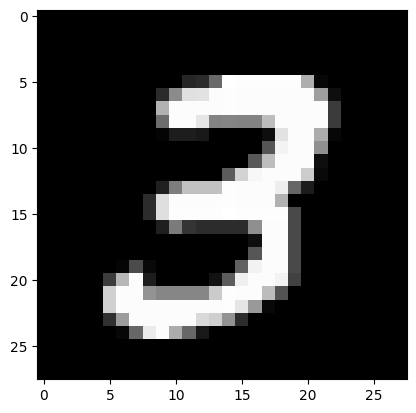

In [4]:
plt.imshow(train_X[7], cmap = 'gray')
print(train_y[7])

In [5]:
num_classes = 10

In [6]:
# Normalising the dataset

In [7]:
train_X = train_X/255
test_X = test_X/255

In [8]:
train_X[0].shape

(28, 28)

In [9]:
# We need to convert it to 3D image

In [10]:
train_X = np.expand_dims(train_X, -1)
test_X = np.expand_dims(test_X, -1)

In [11]:
train_X[0].shape

(28, 28, 1)

In [13]:
from tensorflow.keras.utils import to_categorical

In [14]:
train_y = to_categorical(train_y)
test_y = to_categorical(test_y)

In [15]:
# Now Model Making

In [18]:
img_shape = (28, 28, 1)

In [19]:
from keras import Sequential
from keras.layers import Dense

In [25]:
model = Sequential([
    keras.Input(shape = img_shape),
    keras.layers.Conv2D(20, kernel_size = (5,5), strides = (2,2), padding = 'valid', activation = 'relu'), # (2,2) means 2 row shifter and 2 cols shifter
    keras.layers.Conv2D(40, kernel_size = (5,5), strides = (2,2), padding = 'valid', activation = 'relu'), # valid means no padding
    keras.layers.Conv2D(80, kernel_size = (3,3), strides = (2,2), padding = 'valid', activation = 'relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(500, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax'),
])

In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 12, 12, 20)          │             520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 4, 4, 40)            │          20,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 1, 1, 80)            │          28,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 80)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 500)                 │          40,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           5,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 94,950 (370.90 KB)

 Trainable params: 94,950 (370.90 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [28]:
hist = model.fit(train_X, train_y, batch_size = 100, epochs = 20, validation_split = 0.1)

Epoch 1/20
540/540 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.7794 - loss: 0.7362 - val_accuracy: 0.9612 - val_loss: 0.1281
Epoch 2/20
540/540 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.9612 - loss: 0.1261 - val_accuracy: 0.9690 - val_loss: 0.1015
Epoch 3/20
540/540 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9723 - loss: 0.0887 - val_accuracy: 0.9785 - val_loss: 0.0705
Epoch 4/20
540/540 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9807 - loss: 0.0640 - val_accuracy: 0.9778 - val_loss: 0.0789
Epoch 5/20
540/540 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9833 - loss: 0.0545 - val_accuracy: 0.9797 - val_loss: 0.0647
Epoch 6/20
540/540 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.9864 - loss: 0.0419 - val_accuracy: 0.9800 - val_loss: 0.0629
Epoch 7/20
540/540 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.9884 - loss: 0.0360 - val_accuracy: 0.9765 - val_loss: 0.0830
Epoch 8/20
540/540 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.9893 - loss: 0.0321 - val_